In [1]:
import sys
sys.path.append('/home/shlomi.fenster/notebooks/nemo_stuff/Onboarding/Ensemble/phatgoose')
import pandas as pd
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from data_utils.data import MultiRouterDatasetV0
from model_utils.models import MultiRouterModelV0

/home/shlomi.fenster/.venv/nemoenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_df = pd.read_pickle('router_dataset_v1.pkl')
ds = MultiRouterDatasetV0(dataset_df)
dl = DataLoader(ds, 32, collate_fn=ds.collate_fn, shuffle=True, drop_last=True)

multi_router_model = MultiRouterModelV0(sorted(set(dataset_df['Model'])))

logger = pl.loggers.TensorBoardLogger('/home/shlomi.fenster/notebooks/nemo_stuff/Onboarding/Ensemble/')
trainer = pl.Trainer(max_epochs=2, max_steps=20, val_check_interval=10, log_every_n_steps=10, logger=logger)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [3]:
trainer.fit(multi_router_model, dl)

/home/shlomi.fenster/.venv/nemoenv/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
You are using a CUDA device ('NVIDIA L40S') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type              | Params | Mode 
----------------------------------------------------------
0 | module_dict | ModuleDict        | 17.4 M | train
1 | loss        | BCEWithLogitsLoss | 0      | train
----------------------------------------------------------
17.4 M    Trainable params
0         Non-trainable params
17.4 M    Total params
69.456    Total estimated model params size (

Epoch 0:   0%|          | 20/5458 [00:04<19:51,  4.56it/s, v_num=3] 

`Trainer.fit` stopped: `max_steps=20` reached.


Epoch 0:   0%|          | 20/5458 [00:05<25:54,  3.50it/s, v_num=3]


In [4]:
val_tar_ids = dataset_df['tar_id'].drop_duplicates().sample(100)
val_df = dataset_df[dataset_df['tar_id'].isin(val_tar_ids)]

val_ds = MultiRouterDatasetV0(val_df)
val_dl = DataLoader(val_ds, 64, collate_fn=MultiRouterDatasetV0.collate_fn)

In [5]:
trainer.validate(multi_router_model, val_dl)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.
/home/shlomi.fenster/.venv/nemoenv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Validation DataLoader 0:   3%|▎         | 1/38 [00:00<00:02, 16.97it/s]

/home/shlomi.fenster/.venv/nemoenv/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 64. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
/home/shlomi.fenster/notebooks/nemo_stuff/Onboarding/Ensemble/phatgoose/model_utils/models.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.validation_results_df = pd.concat([self.validation_results_df, batch_val_df])


Validation DataLoader 0: 100%|██████████| 38/38 [00:05<00:00,  6.47it/s]


/home/shlomi.fenster/.venv/nemoenv/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 15. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         val_loss          │    0.6868410110473633     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 0.6868410110473633}]

In [6]:
aaa = multi_router_model.validation_results_df

<Axes: ylabel='Frequency'>

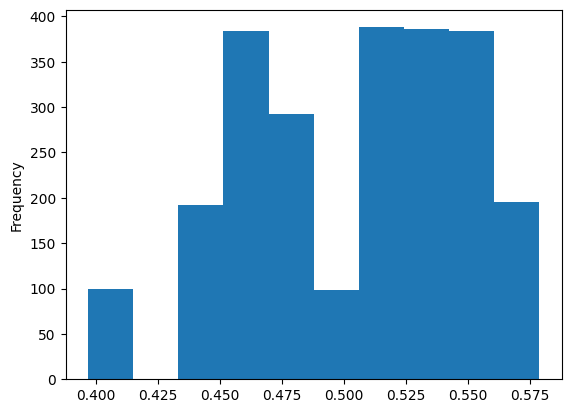

In [11]:
aaa.groupby('tar_id')['Score'].max()

In [9]:
aaa['tar_id'].value_counts()

tar_id
4a1a84eb-24c9-4836-8361-94a5f009b328    25
fdfd78d3-2667-4c6f-97f6-6f8aa2404bd2    25
f1b2463e-895f-4445-9742-e676e862c505    25
c7afa039-9c7b-4e5d-b1a0-aa63881cebb7    25
095e704d-2219-4b96-9b98-de62be23e773    25
                                        ..
e03c8acc-2281-4bdd-8038-1ff415b50e9e    17
f960b043-f982-42a8-a085-508ef4352669    16
0d29d2df-1e16-4546-975a-e7467ad7ff80    15
8328e6c5-6494-4bf5-b5f5-a0339a9ac2cc    13
9c87949f-0398-4a6a-a5e0-02e309c088e1     6
Name: count, Length: 100, dtype: int64

In [8]:
len(aaa)

2418

In [13]:
aaa.iloc[0]

tar_id                  970ffa60-ff80-4694-b334-3d3a12213ffe
Model                                    asaf_kagan_20250226
RouterLabel    tensor(0, device='cuda:0', dtype=torch.int32)
Score                        tensor(0.5522, device='cuda:0')
we                               tensor(7., device='cuda:0')
Name: 0, dtype: object

In [5]:
multi_router_model = multi_router_model.eval()
    

MultiRouterModelV0(
  (module_dict): ModuleDict(
    (asaf_kagan_20250226): Sequential(
      (0): Sequential(
        (0): Unflatten(dim=1, unflattened_size=[1, 512])
        (1): Conv2d(1, 1, kernel_size=(5, 5), stride=(2, 2))
        (2): Flatten(start_dim=1, end_dim=2)
        (3): Mish()
      )
      (1): Sequential(
        (0): Conv1d(254, 256, kernel_size=(5,), stride=(2,))
        (1): Mish()
        (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Transpose()
        (4): SelfAttention(
          (attention_layer): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
        )
        (5): Transpose()
      )
      (2): Sequential(
        (0): Conv1d(256, 64, kernel_size=(5,), stride=(2,))
        (1): Mish()
        (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Transpose()
        (4): SelfAtt

In [5]:
pd.DataFrame([dict(a=1, b='B'), dict(a=10, b='BBB')]).iloc[:0]

,a,b
